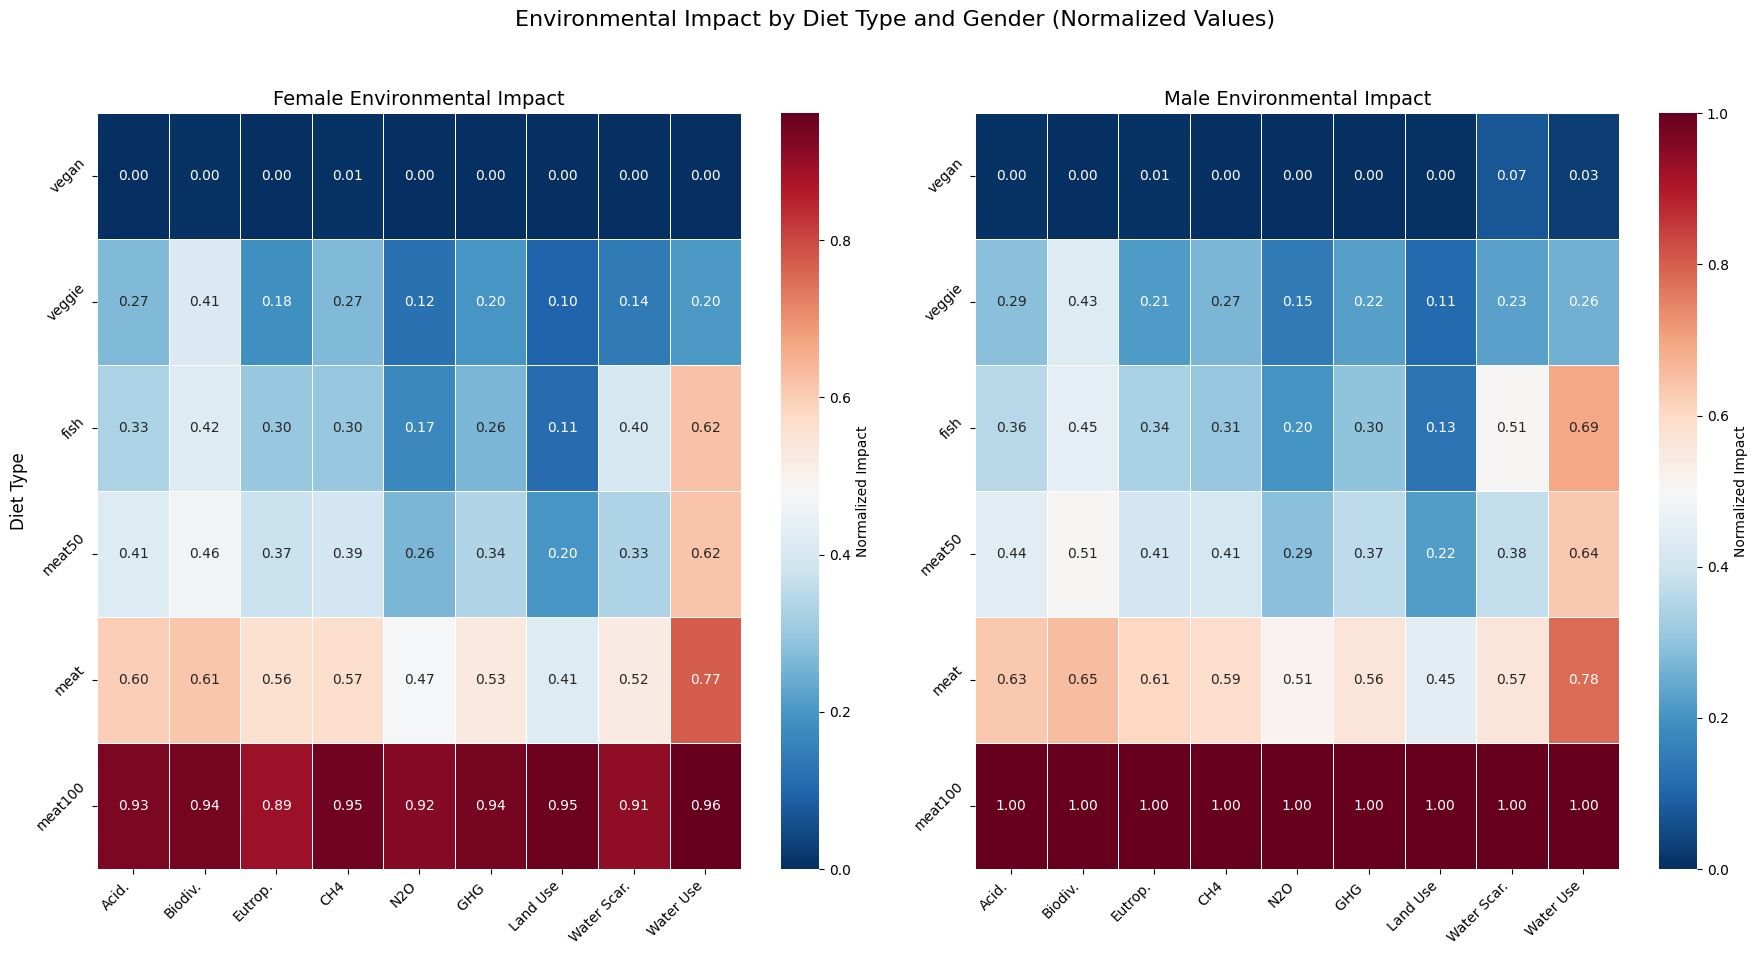

Analysis completed.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('Dataset/Results_21Mar2022.csv')

# Define environmental metrics
env_metrics = ['mean_ghgs', 'mean_land', 'mean_watscar', 'mean_eut', 
               'mean_ghgs_ch4', 'mean_ghgs_n2o', 'mean_bio', 
               'mean_watuse', 'mean_acid']

# Short metric names for compact display
short_labels = {
    'mean_ghgs': 'GHG ',
    'mean_land': 'Land Use',
    'mean_watscar': 'Water Scar.',
    'mean_eut': 'Eutrop.',
    'mean_ghgs_ch4': 'CH4',
    'mean_ghgs_n2o': 'N2O',
    'mean_bio': 'Biodiv.',
    'mean_watuse': 'Water Use',
    'mean_acid': 'Acid.'
}

# Group by diet type and gender, then calculate means
grouped_data = df.groupby(['diet_group', 'sex'])[env_metrics].mean().reset_index()

# Normalize data to compare metrics with different units
for metric in env_metrics:
    min_val = grouped_data[metric].min()
    max_val = grouped_data[metric].max()
    grouped_data[f'{metric}_norm'] = (grouped_data[metric] - min_val) / (max_val - min_val)

# Sort diet types for better comparison
diet_order = ['vegan', 'veggie', 'fish', 'meat50', 'meat', 'meat100']

# Create two heatmaps: one for males, one for females
plt.figure(figsize=(18, 10))

# Extract female and male data separately
female_data = grouped_data[grouped_data['sex'] == 'female']
male_data = grouped_data[grouped_data['sex'] == 'male']

# Create two subplots
plt.subplot(1, 2, 1)
female_pivot = pd.pivot_table(
    female_data, 
    values=[f'{m}_norm' for m in env_metrics], 
    index='diet_group'
).reindex(diet_order)
female_pivot.columns = [short_labels[m.replace('_norm', '')] for m in female_pivot.columns]
sns.heatmap(female_pivot, annot=True, fmt=".2f", cmap="RdBu_r", 
            linewidths=.5, cbar_kws={'label': 'Normalized Impact'})
plt.title('Female Environmental Impact', fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.ylabel('Diet Type', fontsize=12)

plt.subplot(1, 2, 2)
male_pivot = pd.pivot_table(
    male_data, 
    values=[f'{m}_norm' for m in env_metrics], 
    index='diet_group'
).reindex(diet_order)
male_pivot.columns = [short_labels[m.replace('_norm', '')] for m in male_pivot.columns]
sns.heatmap(male_pivot, annot=True, fmt=".2f", cmap="RdBu_r", 
            linewidths=.5, cbar_kws={'label': 'Normalized Impact'})
plt.title('Male Environmental Impact', fontsize=14)
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')
plt.ylabel('')  # Don't repeat y-axis label

plt.suptitle('Environmental Impact by Diet Type and Gender (Normalized Values)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Make room for the main title
plt.savefig('diet_gender_env_heatmap_split.png', dpi=300, bbox_inches='tight')
plt.show()

print("Analysis completed.")